In [2]:
import gym

In [1]:
from spinup import sac_pytorch as sac
from spinup import ddpg_pytorch as ddpg

In [3]:
import torch
import torch.nn as nn
import numpy as np
class HEDGING_Actor(nn.Module):

    def __init__(self, obs_dim, act_dim, act_limit):
        super().__init__()
        self.fc1 = nn.Linear(obs_dim, 100)
        self.ac1 = nn.LeakyReLU(0.1)
        self.fc2 = nn.Linear(100, 50)
        self.ac2 = nn.LeakyReLU(0.1)
        self.fc3 = nn.Linear(50, act_dim)

    def forward(self, obs):
        # Return output from network scaled to action space limits.
        c = obs.numpy()
        if np.isnan(c).any():
            print('fuck1')
            exit()
        for item in c:
            try:
                for it in item:
                    if np.inf == abs(it):
                        print('fuck3')
                        exit()
            except:
                 if np.inf == abs(item):
                     print('fuck3')
                     exit()
        x = self.fc1(obs)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        d = x.detach().numpy()
        if np.isnan(d).any():
            print('fuck2')
            exit()
        return x

class HEDGING_QFunction(nn.Module):

    def __init__(self, obs_dim, act_dim):
        super().__init__()
        self.fc1 = nn.Linear(obs_dim + act_dim, 100)
        self.ac1 = nn.LeakyReLU(0.1)
        self.fc2 = nn.Linear(100, 50)
        self.ac2 = nn.LeakyReLU(0.1)
        self.fc3 = nn.Linear(50, act_dim)

    def forward(self, obs, act):
        x = self.fc1(torch.cat([obs, act], dim=-1))
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        return torch.squeeze(x, -1) # Critical to ensure q has right shape.

class HEDGING(nn.Module):

    def __init__(self, observation_space, action_space,activation=nn.ReLU):
        super().__init__()

        obs_dim = observation_space.shape[0]
        act_dim = action_space.shape[0]
        act_limit = action_space.high[0]

        # build policy and value functions
        self.pi = HEDGING_Actor(obs_dim, act_dim, act_limit)
        self.q = HEDGING_QFunction(obs_dim, act_dim)

    def act(self, obs):
        with torch.no_grad():
            return self.pi(obs).numpy()

Logging data to /tmp/experiments/1596723336/progress.txt
Saving config:

{
    "ac_kwargs":	{},
    "act_noise":	0.1,
    "actor_critic":	"HEDGING",
    "batch_size":	1000,
    "env_fn":	"<function <lambda> at 0x15b6f1dd0>",
    "epochs":	100,
    "gamma":	0.99,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x15b70e710>":	{
            "epoch_dict":	{},
            "exp_name":	null,
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"/tmp/experiments/1596723336",
            "output_file":	{
                "<_io.TextIOWrapper name='/tmp/experiments/1596723336/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{},
    "max_ep_len":	1000,
    "num_test_episodes":	10,
    "pi_lr":	1e-05,
    "polyak":	0.995,
    "q_lr":	1e-05,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "start_ste

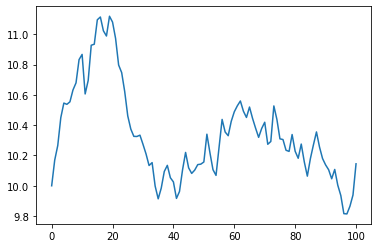

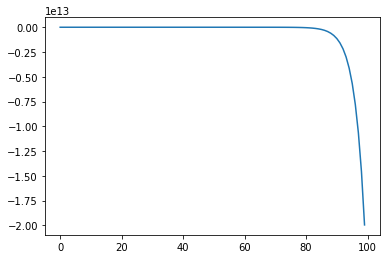

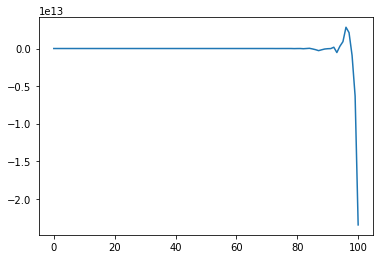

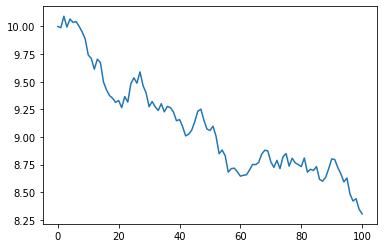

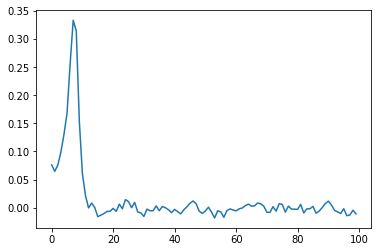

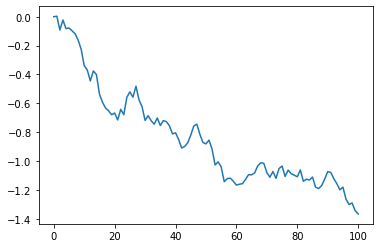

---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |        5.76e+11 |
|          StdEpRet |        4.17e+12 |
|          MaxEpRet |        2.62e+13 |
|          MinEpRet |       -4.18e+12 |
|  AverageTestEpRet |          -0.184 |
|      StdTestEpRet |           0.809 |
|      MaxTestEpRet |            1.27 |
|      MinTestEpRet |           -1.25 |
|             EpLen |             100 |
|         TestEpLen |             100 |
| TotalEnvInteracts |           4e+03 |
|      AverageQVals |       -1.11e+11 |
|          StdQVals |        1.42e+12 |
|          MaxQVals |             1.1 |
|          MinQVals |       -4.26e+13 |
|            LossPi |        1.05e+11 |
|             LossQ |        1.04e+25 |
|              Time |             108 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |           -1.51 |
|          StdEpRet |            1.13 |


In [6]:
actat, ac = ddpg(env_fn=lambda : gym.make('DHENV:DHENV-v1'),pi_lr = 1e-5, q_lr = 1e-5, actor_critic = HEDGING, batch_size= 1000, start_steps=0, update_after= 1000, update_every = 1000)